# Time Series Plotting with Matplotlib
In this notebook, we will learn how to create and customize time series plots using Matplotlib. We will cover:
- Basic time series plotting
- Formatting the time axis
- Annotating maximum and minimum values
- Adding reference lines
- Customizing plot appearance
- Advanced customizations like shaded regions and dual-axis plots


## Part 1: Loading and Preparing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'D:/Projects/fiji-training-2024/data/sample_t2m_fiji.csv'
df = pd.read_csv(file_path, parse_dates=['time'], index_col='time')

# Convert temperature from Kelvin to Celsius
df['t2m_C'] = df['t2m'] - 273.15

# Display the DataFrame
df.head()

,latitude,longitude,t2m,t2m_C
time,,,,
2023-06-01 00:00:00,-17.8,177.4167,301.496529,28.346529
2023-06-01 01:00:00,-17.8,177.4167,301.570176,28.420176
2023-06-01 02:00:00,-17.8,177.4167,301.615832,28.465832
2023-06-01 03:00:00,-17.8,177.4167,301.472180,28.322180
2023-06-01 04:00:00,-17.8,177.4167,300.758050,27.608050


## Part 2: Basic Time Series Plot

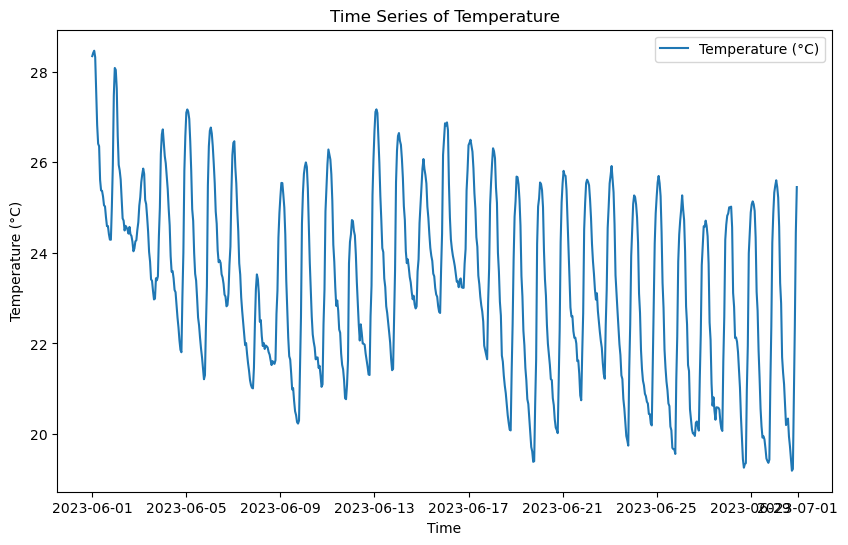

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['t2m_C'], label='Temperature (°C)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Time Series of Temperature')
plt.legend()
plt.show()

### Formatting the Time Axis

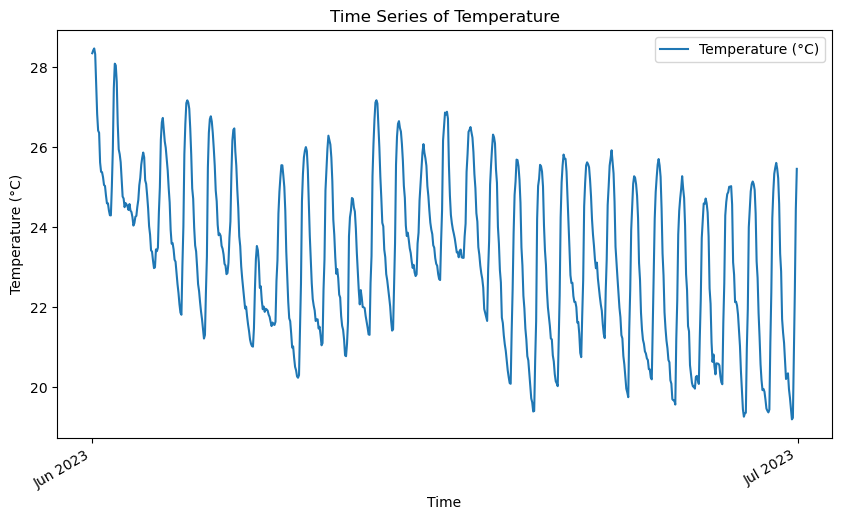

In [4]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['t2m_C'], label='Temperature (°C)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Time Series of Temperature')
plt.legend()

# Formatting the time axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()  # Rotate date labels

plt.show()


### Annotating Maximum and Minimum Values

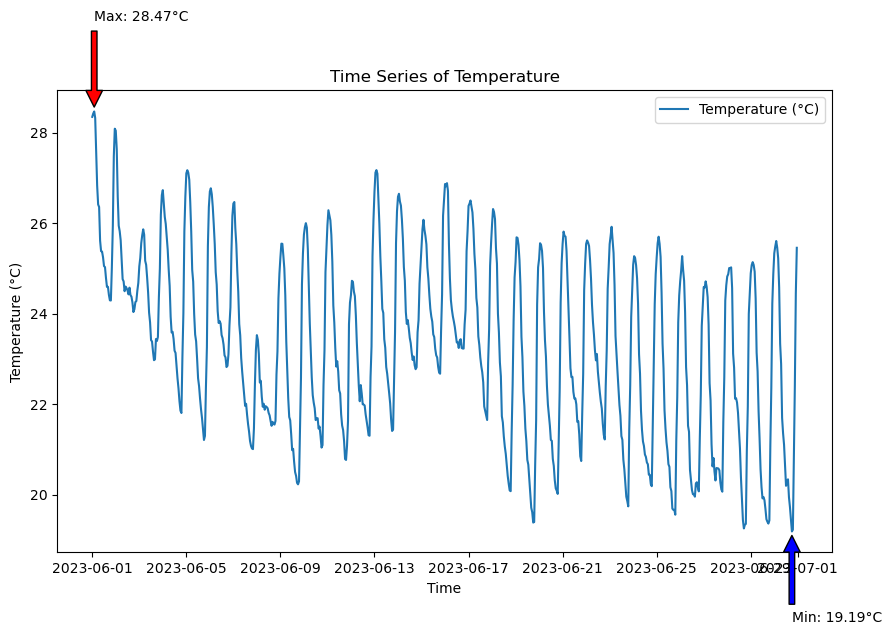

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['t2m_C'], label='Temperature (°C)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Time Series of Temperature')
plt.legend()

# Annotating max and min values
max_temp = df['t2m_C'].max()
min_temp = df['t2m_C'].min()
max_date = df['t2m_C'].idxmax()
min_date = df['t2m_C'].idxmin()

plt.annotate(f'Max: {max_temp:.2f}°C', xy=(max_date, max_temp), xytext=(max_date, max_temp + 2),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate(f'Min: {min_temp:.2f}°C', xy=(min_date, min_temp), xytext=(min_date, min_temp - 2),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()


### Adding Reference Line for Mean Value

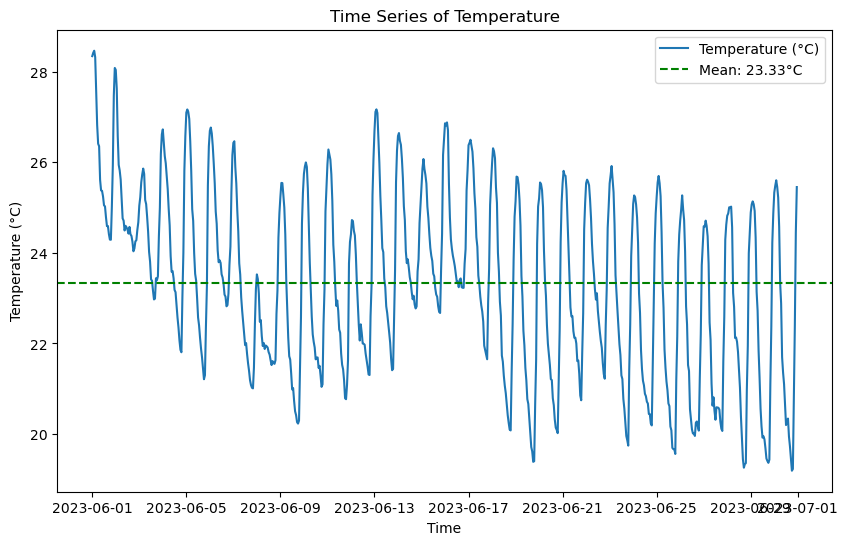

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['t2m_C'], label='Temperature (°C)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Time Series of Temperature')
plt.legend()

# Adding a reference line for the mean value
mean_temp = df['t2m_C'].mean()
plt.axhline(mean_temp, color='green', linestyle='--', label=f'Mean: {mean_temp:.2f}°C')
plt.legend()

plt.show()

### Customizing Plot Appearance

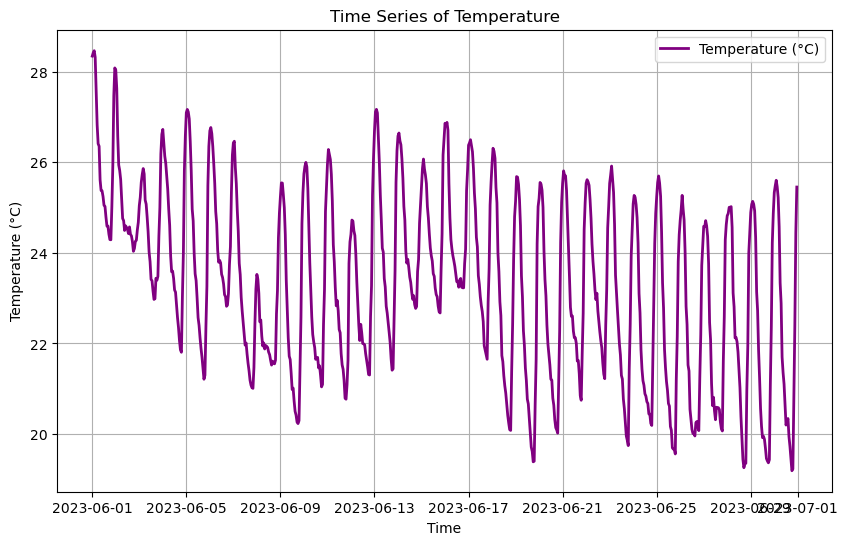

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['t2m_C'], label='Temperature (°C)', color='purple', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Time Series of Temperature')
plt.legend()
plt.grid(True)
plt.show()


### Modifying the Linestyle

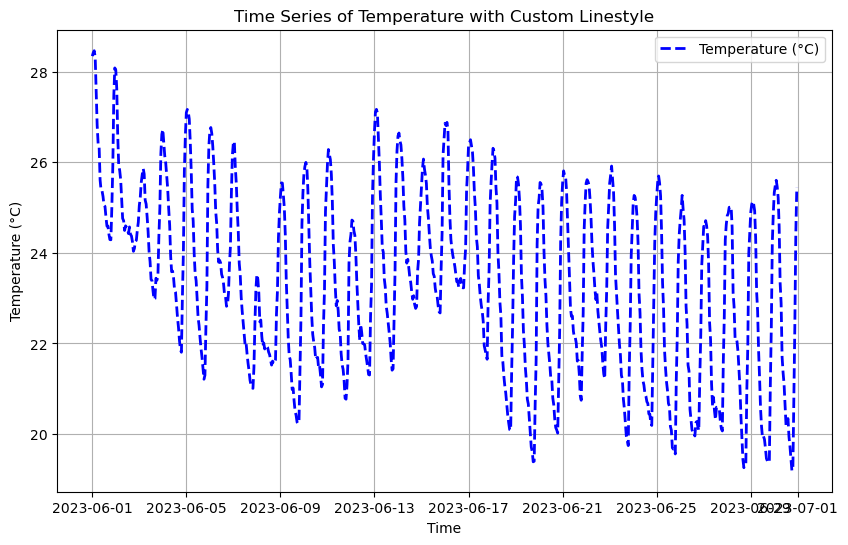

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['t2m_C'], label='Temperature (°C)', linestyle='--', color='blue', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Time Series of Temperature with Custom Linestyle')
plt.legend()
plt.grid(True)
plt.show()


## Part 3: Advanced Customizations
### Shaded Regions

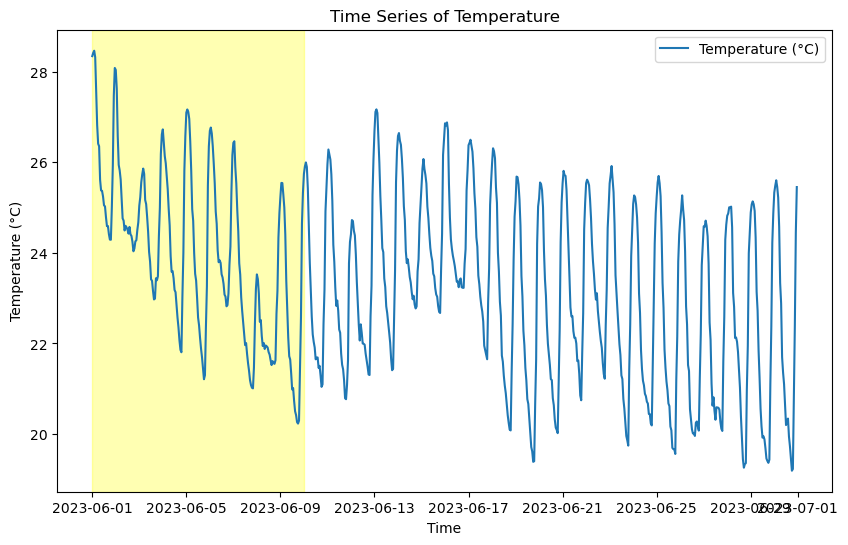

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['t2m_C'], label='Temperature (°C)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Time Series of Temperature')
plt.legend()

# Highlight a specific period
start_date = '2023-06-01'
end_date = '2023-06-10'
plt.axvspan(start_date, end_date, color='yellow', alpha=0.3)

plt.show()


### Dual-Axis Plot

KeyError: 'another_variable'

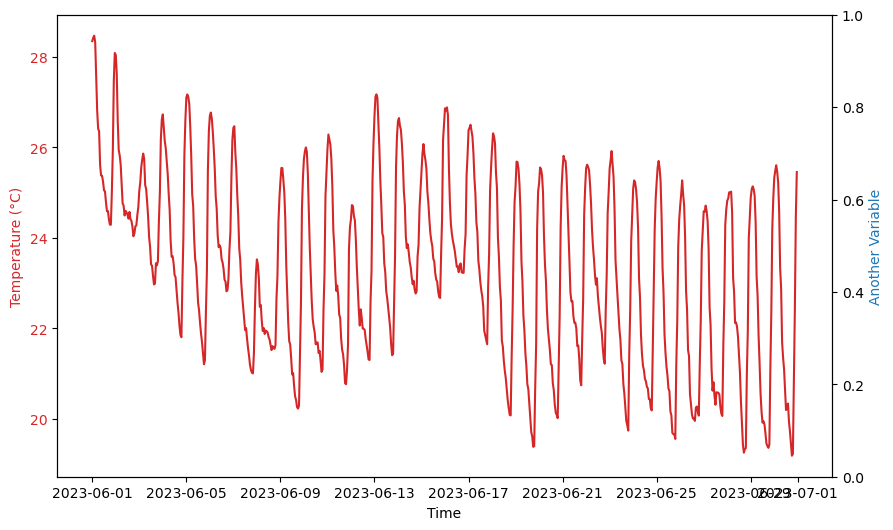

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(df.index, df['t2m_C'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Another Variable', color=color)
ax2.plot(df.index, df['another_variable'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure the labels don't overlap
plt.title('Dual-Axis Time Series Plot')
plt.show()


### Adding Shade Between Daily Max and Min Values and Plotting the Mean

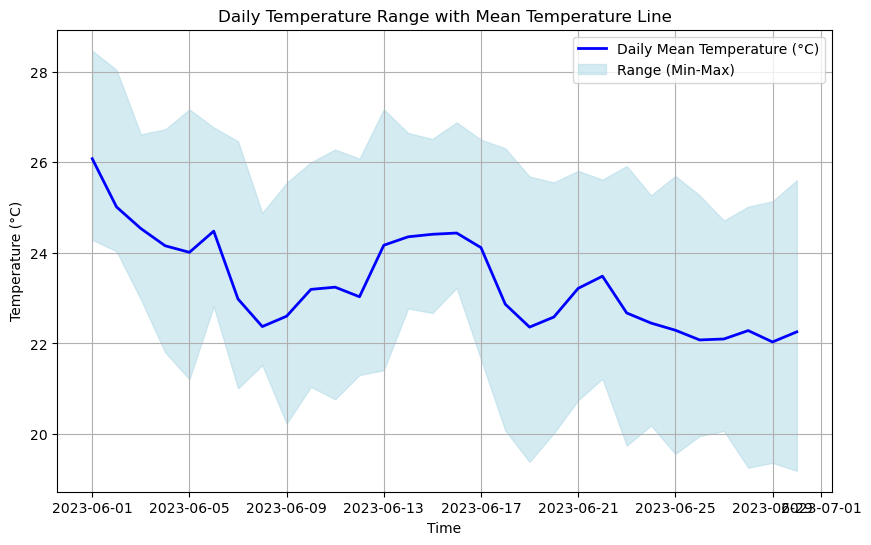

In [12]:
# Resample to get daily statistics
df_daily = df['t2m_C'].resample('D').agg(['min', 'max', 'mean'])

plt.figure(figsize=(10, 6))
plt.plot(df_daily.index, df_daily['mean'], label='Daily Mean Temperature (°C)', color='blue', linewidth=2)
plt.fill_between(df_daily.index, df_daily['min'], df_daily['max'], color='lightblue', alpha=0.5, label='Range (Min-Max)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature Range with Mean Temperature Line')
plt.legend()
plt.grid(True)
plt.show()


### Put line plot and scatter plot on the same graph

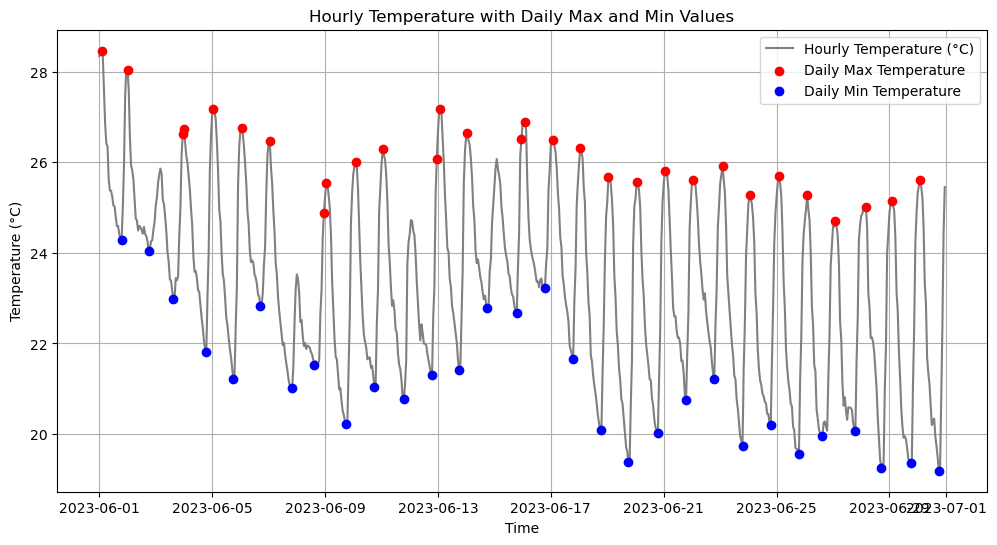

In [15]:
# Calculate daily max and min values along with their corresponding times
daily_max_times = df['t2m_C'].resample('D').apply(lambda x: x.idxmax())
daily_min_times = df['t2m_C'].resample('D').apply(lambda x: x.idxmin())
daily_max_values = df.loc[daily_max_times]
daily_min_values = df.loc[daily_min_times]

plt.figure(figsize=(12, 6))

# Plot the hourly temperature data as a grey line
plt.plot(df.index, df['t2m_C'], color='grey', label='Hourly Temperature (°C)')

# Plot the daily maximum values as red dots
plt.scatter(daily_max_values.index, daily_max_values['t2m_C'], color='red', label='Daily Max Temperature', zorder=5)

# Plot the daily minimum values as blue dots
plt.scatter(daily_min_values.index, daily_min_values['t2m_C'], color='blue', label='Daily Min Temperature', zorder=5)

plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Hourly Temperature with Daily Max and Min Values')
plt.legend()
plt.grid(True)
plt.show()


## Exercise: Time Series Plotting
1. **Exercise 1: Basic Plotting**
   - Load a new dataset and create a basic time series plot of any variable.

2. **Exercise 2: Time Axis Formatting**
   - Format the time axis to show only the first day of each month.

3. **Exercise 3: Annotating Key Values**
   - Annotate the second highest and second lowest temperatures in the plot.

4. **Exercise 4: Adding Reference Lines**
   - Add reference lines for the median and standard deviation of the temperature.

5. **Exercise 5: Customizing Plot Appearance**
   - Change the color and style of the plot lines and add grid lines.

6. **Exercise 6: Shaded Regions**
   - Highlight weekends in the plot using shaded regions.

7. **Exercise 7: Dual-Axis Plotting**
   - Create a dual-axis plot with temperature and another variable (e.g., humidity or wind speed).

8. **Exercise 8: Shading Between Daily Max and Min Values**
   - Shade the area between daily max and min values and plot the mean as a line for a new variable (e.g., humidity).

9. **Exercise 9: Saving the Plot**
   - Save your customized plot as a high-resolution image file.
